# Name: Praveer Raj
# Reg: 230957002
# Roll: 01
# ML- week 4

In [ ]:
#Exercise 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

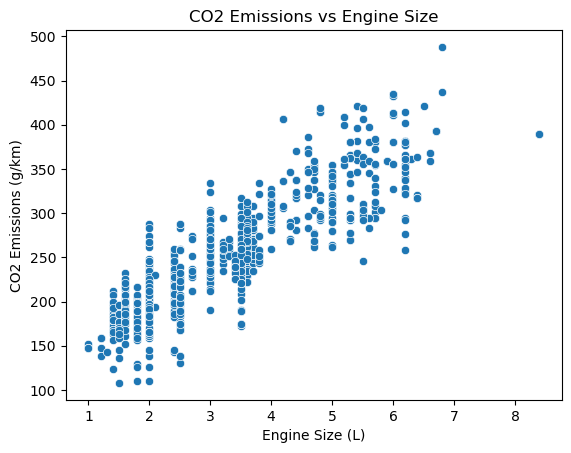

Degree 3:
  Mean Absolute Error (MAE): 11.59
  Residual Sum of Squares (RSS): 85886.96
  R² Score: 0.90

Degree 4:
  Mean Absolute Error (MAE): 10.47
  Residual Sum of Squares (RSS): 87501.02
  R² Score: 0.90

Degree 5:
  Mean Absolute Error (MAE): 11.91
  Residual Sum of Squares (RSS): 132711.32
  R² Score: 0.85

The best model is of degree 4 with MAE: 10.47
Holdout Set Evaluation:
  Mean Absolute Error (MAE): 9.94
  R² Score: 0.93


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


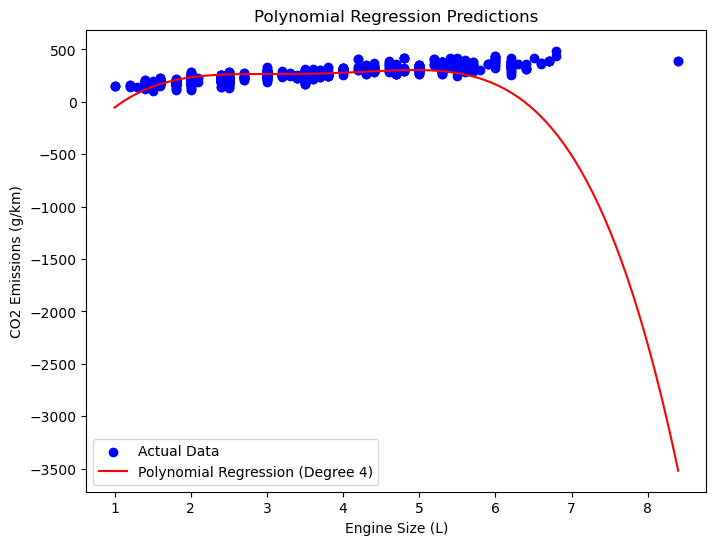

In [3]:
df = pd.read_csv("FuelConsumption.csv")
#print(df.head())
#print(df.describe())
df.columns = df.columns.str.strip()

#Question 1
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=df)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

#Question 2
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
df = df[features]
train_val_df, holdout_df = train_test_split(df, test_size=0.3, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.3, random_state=42)
X_train = train_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_train = train_df['CO2EMISSIONS']
X_val = val_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_val = val_df['CO2EMISSIONS']
X_holdout = holdout_df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_holdout = holdout_df['CO2EMISSIONS']

#Question 3
def evaluate_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mae = mean_absolute_error(y_test, y_test_pred)
    rss = np.sum((y_test - y_test_pred) ** 2)
    r2 = r2_score(y_test, y_test_pred)

    return mae, rss, r2, model, poly_features

degrees = [3, 4, 5]
results = {}

for degree in degrees:
    mae, rss, r2, model, poly_features = evaluate_polynomial_regression(degree, X_train, y_train, X_val, y_val)
    results[degree] = {'MAE': mae, 'RSS': rss, 'R²': r2, 'model': model, 'poly_features': poly_features}

for degree, metrics in results.items():
    print(f"Degree {degree}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Residual Sum of Squares (RSS): {metrics['RSS']:.2f}")
    print(f"  R² Score: {metrics['R²']:.2f}")
    print()

best_degree = min(results, key=lambda k: results[k]['MAE'])
best_model = results[best_degree]['model']
best_poly_features = results[best_degree]['poly_features']

print(f"The best model is of degree {best_degree} with MAE: {results[best_degree]['MAE']:.2f}")

X_holdout_poly = best_poly_features.transform(X_holdout)
y_holdout_pred = best_model.predict(X_holdout_poly)

mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)

print(f"Holdout Set Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae_holdout:.2f}")
print(f"  R² Score: {r2_holdout:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue', label='Actual Data')
X_plot = np.linspace(df['ENGINESIZE'].min(), df['ENGINESIZE'].max(), 100).reshape(-1, 1)
# For visualization, we'll fix CYLINDERS and FUELCONSUMPTION_COMB to their mean values
X_plot_full = np.column_stack((
    X_plot,
    np.full_like(X_plot, df['CYLINDERS'].mean()),
    np.full_like(X_plot, df['FUELCONSUMPTION_COMB'].mean())
))
X_plot_poly = best_poly_features.transform(X_plot_full)
y_plot_pred = best_model.predict(X_plot_poly)
plt.plot(X_plot, y_plot_pred, color='red', label=f'Polynomial Regression (Degree {best_degree})')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()

In [4]:
#Exercise 2

Mean Squared Error (Ridge) on Validation Data: 1024843172143.4899
Mean Squared Error (Lasso) on Validation Data: 1025670320500.5302
Mean Squared Error (Ridge) on Holdout Data: 1737317634483.6475
Mean Squared Error (Lasso) on Holdout Data: 1736898354810.1682
      Actual  Predicted_Ridge  Predicted_Lasso
316  4060000     5.184125e+06     5.186924e+06
77   6650000     7.295521e+06     7.302335e+06
360  3710000     2.996298e+06     2.993519e+06
90   6440000     4.527680e+06     4.526150e+06
493  2800000     3.155741e+06     3.152192e+06


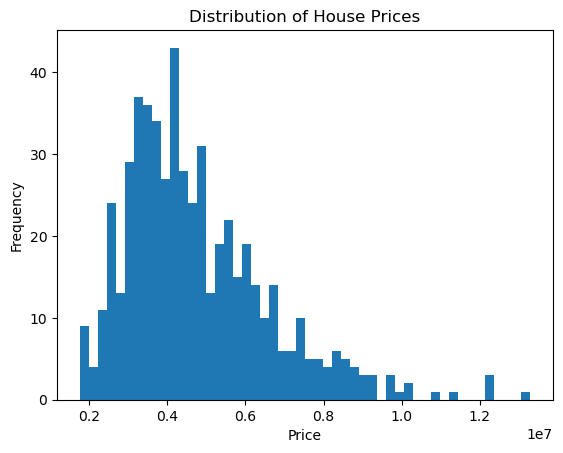

In [10]:
from sklearn.metrics import mean_squared_error
df = pd.read_csv("Housing.csv")
df.columns = df.columns.str.strip()  # Clean column names by stripping extra spaces
df = df.dropna()  # Drop rows with missing values

# One-hot encode categorical variables (if any)
df_encoded = pd.get_dummies(df, drop_first=True)

# Question 1: Prepare features and target variable
X = df_encoded.drop('price', axis=1)  
y = df_encoded['price']  

X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)  # 60% train, 20% validation

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_holdout_scaled = scaler.transform(X_holdout)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

y_pred_ridge_val = ridge_model.predict(X_val_scaled)
y_pred_lasso_val = lasso_model.predict(X_val_scaled)

mse_ridge_val = mean_squared_error(y_val, y_pred_ridge_val)
mse_lasso_val = mean_squared_error(y_val, y_pred_lasso_val)

print(f"Mean Squared Error (Ridge) on Validation Data: {mse_ridge_val}")
print(f"Mean Squared Error (Lasso) on Validation Data: {mse_lasso_val}")

y_pred_ridge_holdout = ridge_model.predict(X_holdout_scaled)
y_pred_lasso_holdout = lasso_model.predict(X_holdout_scaled)

mse_ridge_holdout = mean_squared_error(y_holdout, y_pred_ridge_holdout)
mse_lasso_holdout = mean_squared_error(y_holdout, y_pred_lasso_holdout)

print(f"Mean Squared Error (Ridge) on Holdout Data: {mse_ridge_holdout}")
print(f"Mean Squared Error (Lasso) on Holdout Data: {mse_lasso_holdout}")

comparison_df = pd.DataFrame({
    'Actual': y_holdout,
    'Predicted_Ridge': y_pred_ridge_holdout,
    'Predicted_Lasso': y_pred_lasso_holdout
})

print(comparison_df.head())

import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
